Guy Yutal - 3080138

Matan Leventer - 208447029

In [1]:
pip install spmf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import requests
import numpy as np
import pandas as pd
from spmf import Spmf
import matplotlib.pyplot as plt

In [3]:
def save_jar():
  file_name = "/usr/local/lib/python3.8/dist-packages/spmf"
  url = "https://www.philippe-fournier-viger.com/spmf/download-spmfjar.php"
  open(file_name+"/spmf.jar",'wb').write(requests.get(url,allow_redirects=True).content)
save_jar()

In [4]:
data_1 =pd.read_csv('Question1.csv')

In [5]:
data_1.head()

,Sid,Eid,eventA,eventB,eventC
0,1,1,87.32,58.20,32.93
1,1,2,37.80,68.16,59.57
2,1,3,70.23,-3.69,34.04
3,1,4,60.76,33.86,35.85
4,1,5,85.62,60.74,65.74


#Q1#


**Q - 1.1**

In [6]:
data_3_freq=data_1.copy()
data_5_freq=data_1.copy()
data_3_widt=data_1.copy()
data_5_widt=data_1.copy()

In [7]:
data_3_freq['eventA'] = pd.qcut(data_3_freq['eventA'],q=3,labels=range(1,4))
data_3_freq['eventB'] = pd.qcut(data_3_freq['eventB'],q=3,labels=range(4,7))
data_3_freq['eventC'] = pd.qcut(data_3_freq['eventC'],q=3,labels=range(7,10))

In [8]:
data_3_freq.head()

,Sid,Eid,eventA,eventB,eventC
0,1,1,3,5,7
1,1,2,1,6,8
2,1,3,3,4,7
3,1,4,2,4,7
4,1,5,3,5,9


In [9]:
data_3_widt['eventA'] = pd.cut(data_3_widt['eventA'],bins=3,labels=range(1,4))
data_3_widt['eventB'] = pd.cut(data_3_widt['eventB'],bins=3,labels=range(4,7))
data_3_widt['eventC'] = pd.cut(data_3_widt['eventC'],bins=3,labels=range(7,10))

In [10]:
data_3_widt.head()

,Sid,Eid,eventA,eventB,eventC
0,1,1,3,5,8
1,1,2,2,5,8
2,1,3,2,4,8
3,1,4,2,5,8
4,1,5,3,5,8


In [11]:
data_5_freq['eventA'] = pd.qcut(data_5_freq['eventA'],q=5,labels=range(1,6))
data_5_freq['eventB'] = pd.qcut(data_5_freq['eventB'],q=5,labels=range(6,11))
data_5_freq['eventC'] = pd.qcut(data_5_freq['eventC'],q=5,labels=range(11,16))

In [12]:
data_5_freq.head()

,Sid,Eid,eventA,eventB,eventC
0,1,1,5,8,12
1,1,2,2,9,14
2,1,3,4,6,12
3,1,4,4,7,12
4,1,5,5,9,14


In [13]:
data_5_widt['eventA'] = pd.cut(data_5_widt['eventA'],bins=5,labels=range(1,6))
data_5_widt['eventB'] = pd.cut(data_5_widt['eventB'],bins=5,labels=range(6,11))
data_5_widt['eventC'] = pd.cut(data_5_widt['eventC'],bins=5,labels=range(11,16))

In [14]:
data_5_widt.head()

,Sid,Eid,eventA,eventB,eventC
0,1,1,4,8,12
1,1,2,2,8,13
2,1,3,3,6,12
3,1,4,3,7,12
4,1,5,4,8,13


In [15]:
#create txtt file
def create_txt(df,i,k):
  with open(f'readme_{i}_{k}.txt', 'w') as f:
    r=0
    for index,row in df.iterrows():
      if(r==5):
        r=0
        f.write(str('-2\n'))
      r+=1
      f.write(str(row['eventA']))
      f.write(str(' '))
      f.write(str(row['eventB']))
      f.write(str(' '))
      f.write(str(row['eventC']))
      f.write(str(' '))
      f.write(str('-1'))
      f.write(str(' '))
    f.write(str('-2\n'))

**Q - 1.2**

In [16]:
list_db = [data_3_widt,data_3_freq,data_5_widt,data_5_freq]
name_db = ['3_widt','3_freq','5_widt','5_freq']

list_patterns=[[],[],[],[]]
for i in range(4):
  if i<=1:
      create_txt(list_db[i],i,3)
      k=3
  else:
      create_txt(list_db[i],i,5)
      k=5
  for min_sup in np.arange(0.2,1,0.1):
    spmf = Spmf("PrefixSpan", input_filename=f'readme_{i}_{k}.txt',output_filename=f'output_{round(min_sup,1)}_{name_db[i]}.txt', arguments=[min_sup])
    spmf.run()
    list_patterns[i].append(spmf.to_pandas_dataframe(pickle=True).shape[0])

>/usr/local/lib/python3.8/dist-packages/spmf/spmf.jar
=============  PREFIXSPAN 0.99-2016 - STATISTICS =============
 Total time ~ 269 ms
 Frequent sequences count : 2796
 Max memory (mb) : 24.365280151367188
 minsup = 20 sequences.
 Pattern count : 2796


>/usr/local/lib/python3.8/dist-packages/spmf/spmf.jar
=============  PREFIXSPAN 0.99-2016 - STATISTICS =============
 Total time ~ 113 ms
 Frequent sequences count : 1016
 Max memory (mb) : 13.37310791015625
 minsup = 31 sequences.
 Pattern count : 1016


>/usr/local/lib/python3.8/dist-packages/spmf/spmf.jar
=============  PREFIXSPAN 0.99-2016 - STATISTICS =============
 Total time ~ 84 ms
 Frequent sequences count : 465
 Max memory (mb) : 10.69921875
 minsup = 41 sequences.
 Pattern count : 465


>/usr/local/lib/python3.8/dist-packages/spmf/spmf.jar
=============  PREFIXSPAN 0.99-2016 - STATISTICS =============
 Total time ~ 65 ms
 Frequent sequences count : 236
 Max memory (mb) : 10.69921875
 minsup = 51 sequences.
 Pattern count :

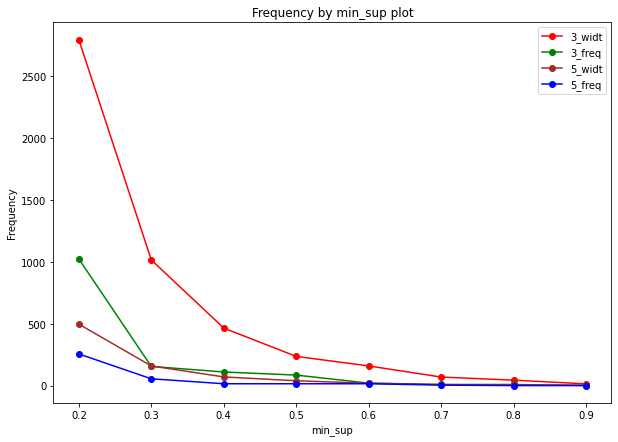

In [17]:
plt.figure(figsize=(10,7))
plt.plot([str(round(x,1)) for x in  np.arange(0.2,1,0.1)], list_patterns[0],color='red',marker='o')
plt.plot([str(round(x,1)) for x in  np.arange(0.2,1,0.1)], list_patterns[1],color='green',marker='o')
plt.plot([str(round(x,1)) for x in  np.arange(0.2,1,0.1)], list_patterns[2],color='brown',marker='o')
plt.plot([str(round(x,1)) for x in  np.arange(0.2,1,0.1)], list_patterns[3],color='blue',marker='o')

plt.xlabel("min_sup")
plt.ylabel("Frequency")
plt.title('Frequency by min_sup plot')
plt.legend(name_db)
plt.show()

**Q - 1.4**

In [18]:
spmf = Spmf("VMSP", input_filename=f'readme_{0}_{3}.txt',output_filename='output_try.txt', arguments=[0.8])
spmf.run()
print(spmf.to_pandas_dataframe(pickle=True))

>/usr/local/lib/python3.8/dist-packages/spmf/spmf.jar
=============  VMSP v0.97 - STATISTICS =============
 Total time ~ 56 ms
 Frequent sequences count : 35
 Max memory (mb) : 8.6992187535
minsup 80
Intersection count 159 


      pattern  sup
0   [8, 8, 8]   82
1    [5 8, 8]   82
2   [8, 8, 5]   82
3    [8, 5 8]   87
4   [8, 5, 8]   81
5   [5, 8, 8]   80
6   [5, 8, 5]   80
7   [8, 8, 2]   82
8    [8, 2 8]   87
9   [8, 2, 8]   81
10  [2, 8, 8]   82
11   [5, 5 8]   81
12   [5 8, 5]   80
13   [2 8, 8]   86
14   [2 5, 8]   87
15   [5 8, 2]   83
16  [2, 5, 8]   81
17   [5, 2 8]   86
18  [5, 2, 8]   81
19  [2, 8, 5]   81
20   [2 8, 5]   86
21   [2, 5 8]   83
22  [8, 2, 5]   80
23  [8, 5, 2]   80
24   [8, 2 5]   83
25    [2 5 8]   84
26   [2, 2 8]   90
27   [2 8, 2]   85
28  [8, 2, 2]   81
29  [2, 2, 8]   81
30   [5, 2 5]   80
31   [2 5, 2]   85
32   [2, 2 5]   83
33  [5, 2, 2]   81
34  [2, 2, 2]   84


**Q - 1.5**

In [19]:
spmf = Spmf("BIDE+", input_filename=f'readme_{0}_{3}.txt',output_filename='output_try.txt', arguments=[0.8])
spmf.run()
print(spmf.to_pandas_dataframe(pickle=True))

>/usr/local/lib/python3.8/dist-packages/spmf/spmf.jar
============  BIDE+ - SPMF 0.99c - 2016 - STATISTICS =====
 Total time ~ 130 ms
 Frequent sequences count : 50
 Max memory (mb) : 10.69921875
 minsup = 80 sequences.
 Pattern count : 50


      pattern  sup
0     [2 5 8]   84
1    [2 5, 2]   85
2    [2 5, 8]   87
3       [2 5]   94
4    [2 8, 2]   85
5    [2 8, 5]   86
6    [2 8, 8]   86
7       [2 8]   98
8    [2, 2 5]   83
9    [2, 2 8]   90
10  [2, 2, 2]   84
11  [2, 2, 8]   81
12     [2, 2]   98
13   [2, 5 8]   83
14  [2, 5, 8]   81
15     [2, 5]   96
16  [2, 8, 5]   81
17  [2, 8, 8]   82
18     [2, 8]   97
19        [2]  100
20   [5 8, 2]   83
21   [5 8, 5]   80
22   [5 8, 8]   82
23      [5 8]   95
24   [5, 2 5]   80
25   [5, 2 8]   86
26  [5, 2, 2]   81
27  [5, 2, 8]   81
28     [5, 2]   95
29   [5, 5 8]   81
30     [5, 5]   90
31  [5, 8, 5]   80
32  [5, 8, 8]   80
33     [5, 8]   96
34        [5]  100
35   [8, 2 5]   83
36   [8, 2 8]   87
37  [8, 2, 2]   81
38  [8, 2, 5]   8

#Q2#


In [20]:
data_2 =pd.read_csv('Question2.csv')
data_2.head()

,SID,Team,Events,Event Names,Sub Events,Sub Event Names
0,0,1609,"[8, 8, 8, 8, 8, 8]","['Pass', 'Pass', 'Pass', 'Pass', 'Pass', 'Pass']","[85, 83, 82, 82, 85, 85]","['Simple pass', 'High pass', 'Head pass', 'Hea..."
1,1,1631,"[8, 1]","['Pass', 'Duel']","[82, 10]","['Head pass', 'Air duel']"
2,2,1609,"[1, 8, 8, 8]","['Duel', 'Pass', 'Pass', 'Pass']","[10, 82, 82, 83]","['Air duel', 'Head pass', 'Head pass', 'High p..."
3,3,1609,"[1, 8]","['Duel', 'Pass']","[10, 83]","['Air duel', 'High pass']"
4,4,1631,"[8, 8, 8, 8, 8]","['Pass', 'Pass', 'Pass', 'Pass', 'Pass']","[82, 82, 85, 85, 83]","['Head pass', 'Head pass', 'Simple pass', 'Sim..."


**Q - 2.1**

In [21]:
with open('q2_sub_events.txt', 'w') as f:
  for index,row in data_2.iterrows():
    f.write(str(row['Sub Events'][1:-1].replace(',',' -1') +' -2\n'))

In [22]:
list_patterns_sub_events=[]
for min_sup in np.arange(0.05,0.45,0.05):
    spmf = Spmf("PrefixSpan", input_filename='q2_sub_events.txt',output_filename=f'output_{round(min_sup,2)}_sub_events.txt', arguments=[min_sup])
    spmf.run()
    list_patterns_sub_events.append(spmf.to_pandas_dataframe(pickle=True).shape[0])

>/usr/local/lib/python3.8/dist-packages/spmf/spmf.jar
=============  PREFIXSPAN 0.99-2016 - STATISTICS =============
 Total time ~ 17 ms
 Frequent sequences count : 28
 Max memory (mb) : 8.101272583007812
 minsup = 19 sequences.
 Pattern count : 28


>/usr/local/lib/python3.8/dist-packages/spmf/spmf.jar
=============  PREFIXSPAN 0.99-2016 - STATISTICS =============
 Total time ~ 17 ms
 Frequent sequences count : 14
 Max memory (mb) : 8.101272583007812
 minsup = 38 sequences.
 Pattern count : 14


>/usr/local/lib/python3.8/dist-packages/spmf/spmf.jar
=============  PREFIXSPAN 0.99-2016 - STATISTICS =============
 Total time ~ 21 ms
 Frequent sequences count : 8
 Max memory (mb) : 7.901191711425781
 minsup = 57 sequences.
 Pattern count : 8


>/usr/local/lib/python3.8/dist-packages/spmf/spmf.jar
=============  PREFIXSPAN 0.99-2016 - STATISTICS =============
 Total time ~ 17 ms
 Frequent sequences count : 4
 Max memory (mb) : 8.101272583007812
 minsup = 76 sequences.
 Pattern count : 4




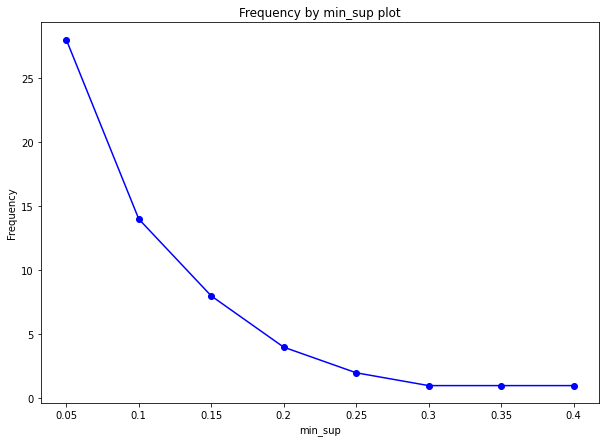

In [23]:
plt.figure(figsize=(10,7))
plt.plot([str(round(x,2)) for x in  np.arange(0.05,0.45,0.05)], list_patterns_sub_events,color='blue',marker='o')

plt.xlabel("min_sup")
plt.ylabel("Frequency")
plt.title('Frequency by min_sup plot')
plt.show()

**Q - 2.2**

it is differ from Q1:
First of all it dependent in the database size (transactions number). 
Second we have less combinations of events cause we don't have here situations that two events can occur toghther.

if our database was represent a commercial site it was bigger because of the number of events that we have, and again the reason that the combination here is less then comercial site that we can buy couple of items toghther. 

**Q - 2.3**

In [24]:
with open('q2_events.txt', 'w') as f:
  for index,row in data_2.iterrows():
    f.write(str(row['Events'][1:-1].replace(',',' -1') +' -2\n'))

In [25]:
list_patterns_events=[]
for min_sup in np.arange(0.05,0.45,0.05):
    spmf = Spmf("PrefixSpan", input_filename='q2_events.txt',output_filename=f'output_{round(min_sup,2)}_events.txt', arguments=[min_sup])
    spmf.run()
    list_patterns_events.append(spmf.to_pandas_dataframe(pickle=True).shape[0])

>/usr/local/lib/python3.8/dist-packages/spmf/spmf.jar
=============  PREFIXSPAN 0.99-2016 - STATISTICS =============
 Total time ~ 16 ms
 Frequent sequences count : 33
 Max memory (mb) : 8.103302001953125
 minsup = 19 sequences.
 Pattern count : 33


>/usr/local/lib/python3.8/dist-packages/spmf/spmf.jar
=============  PREFIXSPAN 0.99-2016 - STATISTICS =============
 Total time ~ 32 ms
 Frequent sequences count : 17
 Max memory (mb) : 8.103302001953125
 minsup = 38 sequences.
 Pattern count : 17


>/usr/local/lib/python3.8/dist-packages/spmf/spmf.jar
=============  PREFIXSPAN 0.99-2016 - STATISTICS =============
 Total time ~ 17 ms
 Frequent sequences count : 9
 Max memory (mb) : 8.114906311035156
 minsup = 57 sequences.
 Pattern count : 9


>/usr/local/lib/python3.8/dist-packages/spmf/spmf.jar
=============  PREFIXSPAN 0.99-2016 - STATISTICS =============
 Total time ~ 14 ms
 Frequent sequences count : 7
 Max memory (mb) : 7.901214599609375
 minsup = 76 sequences.
 Pattern count : 7




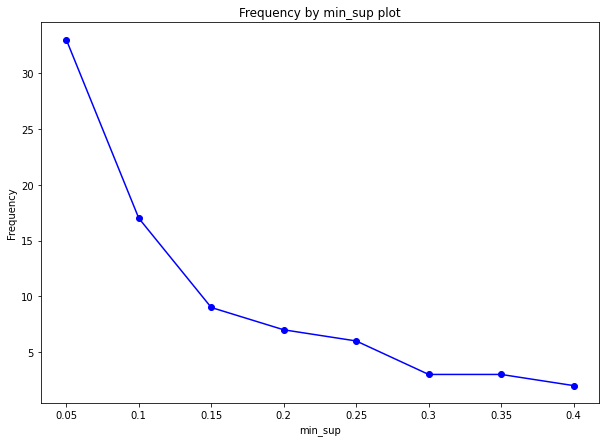

In [26]:
plt.figure(figsize=(10,7))
plt.plot([str(round(x,2)) for x in  np.arange(0.05,0.45,0.05)], list_patterns_events,color='blue',marker='o')

plt.xlabel("min_sup")
plt.ylabel("Frequency")
plt.title('Frequency by min_sup plot')
plt.show()

First, the amount of patterns we will discover will be greater in the event, but when we reduce the minimum support more, then the situation will change, so a sub-event will indicate a larger number of patterns.
It is important to note that the number of possible combinations of a sub-event is greater than the number of situations that will be generated when we consider only the event.
In addition, when we want to derive insights, it would be more correct to look at sub-events because that way we can know in detail, for example, what led to a goal.

**Q - 2.4**

In [27]:
spmf = Spmf("PrefixSpan", input_filename='q2_events.txt',output_filename=f'output_{round(min_sup,2)}_events.txt', arguments=[0])
spmf.run()
df_event = spmf.to_pandas_dataframe(pickle=True)

>/usr/local/lib/python3.8/dist-packages/spmf/spmf.jar
=============  PREFIXSPAN 0.99-2016 - STATISTICS =============
 Total time ~ 48 ms
 Frequent sequences count : 588
 Max memory (mb) : 8.50341796875
 minsup = 1 sequences.
 Pattern count : 588




In [28]:
count_8_8_8 = df_event[df_event.pattern.apply(lambda x: x == ['8','8','8'])]['sup'].values[0]
count_attack = data_2.shape[0]
print(f'{round((count_8_8_8/count_attack)*100,2)}% of attacks occur at least 3 ball passes by the same team')

25.59% of attacks occur at least 3 ball passes by the same team


**Q - 2.5**

In [29]:
spmf = Spmf("PrefixSpan", input_filename='q2_sub_events.txt',output_filename=f'output_{round(min_sup,2)}_events.txt', arguments=[0])
spmf.run()
df_sub_event = spmf.to_pandas_dataframe(pickle=True)

>/usr/local/lib/python3.8/dist-packages/spmf/spmf.jar
=============  PREFIXSPAN 0.99-2016 - STATISTICS =============
 Total time ~ 57 ms
 Frequent sequences count : 3307
 Max memory (mb) : 9.901191711425781
 minsup = 1 sequences.
 Pattern count : 3307




In [30]:
count_36 = df_sub_event[df_sub_event.pattern.apply(lambda x: x == ['36'])]['sup'].values[0]
print(f'{count_36} occur throw in all game')

47 occur throw in all game


In [31]:
count = 0
for i in range(80,87):
  try:
    count += df_sub_event[df_sub_event.pattern.apply(lambda x: x == ['36', str(i)])]['sup'].values[0]
  except:
    continue
print(f'{round((count/count_36)*100,2)}% throw in that continue to pass in all game')

72.34% throw in that continue to pass in all game


**Q - 2.6**

In [32]:
spmf = Spmf("PrefixSpan", input_filename='q2_sub_events.txt',output_filename=f'output_{round(min_sup,2)}_events.txt', arguments=[0.09])
spmf.run()
print(spmf.to_pandas_dataframe(pickle=True))

>/usr/local/lib/python3.8/dist-packages/spmf/spmf.jar
=============  PREFIXSPAN 0.99-2016 - STATISTICS =============
 Total time ~ 24 ms
 Frequent sequences count : 16
 Max memory (mb) : 8.101272583007812
 minsup = 35 sequences.
 Pattern count : 16


                 pattern  sup
0                   [36]   47
1                   [72]   65
2                   [10]   58
3                   [11]   85
4                   [12]   38
5                   [13]   51
6                   [80]   35
7                   [82]   42
8                   [50]   73
9                   [83]   57
10                  [85]  184
11              [85, 83]   35
12              [85, 85]  112
13          [85, 85, 85]   78
14      [85, 85, 85, 85]   54
15  [85, 85, 85, 85, 85]   40


High sequence of 85,83 that is 85 is simple pass and 83 is high pass.
It does not help us to understand new information if the pass was high or simple

**Q - 2.7**

because the number of attack is bigger so the denominator will be bigger there for the min support will decrease and only few sub events will include in the support.

#Q3#


**Q - 3.1**

In [33]:
data_3 =pd.read_csv('Question3.csv')

In [34]:
data_3.head()

,SID,EID,Events
0,1,1,"['20', '21', '25', '39', '46', '52', '58']"
1,1,2,"['0', '42', '52', '69']"
2,1,3,"['43', '56', '98']"
3,1,4,"['27', '40', '73']"
4,2,1,"['20', '43', '58']"


In [35]:
with open('q3_events.txt', 'w') as f:
  sid=1
  for index,row in data_3.iterrows():
    sid_curr = row['SID']
    if sid == sid_curr:
      f.write((row['Events'][1:-1]).replace(',','').replace("'",'') +' -1 ')
    else:
      sid=row['SID']
      f.write('-2\n')
      f.write((row['Events'][1:-1]).replace(',','').replace("'",'') +' -1 ')
  f.write('-2\n')

In [36]:
spmf = Spmf("PrefixSpan", input_filename='q3_events.txt',output_filename=f'output_3.txt', arguments=[0.3])
spmf.run()
df_3_pat = spmf.to_pandas_dataframe(pickle=True)

>/usr/local/lib/python3.8/dist-packages/spmf/spmf.jar
=============  PREFIXSPAN 0.99-2016 - STATISTICS =============
 Total time ~ 99 ms
 Frequent sequences count : 120
 Max memory (mb) : 10.69921875
 minsup = 90 sequences.
 Pattern count : 120




In [37]:
sorted([(i[0],i[1]) for i in df_3_pat.to_records(index=False)  if ('20 58' in i[0] or '58 20' in i[0]) and len(i[0])>1],key = lambda x:x[1],reverse =True)

[(['20 58', '40'], 122),
 (['20', '20 58'], 117),
 (['40', '20 58'], 115),
 (['20 58', '43'], 113),
 (['20 58', '20'], 112),
 (['58', '20 58'], 105),
 (['20 58', '58'], 103),
 (['43', '20 58'], 103),
 (['20 58', '20 58'], 102),
 (['46', '20 58'], 98)]

we want to increase site profits, we will suggest to the client the to purch item number '40' because this item buy togther with item's 20,58 in maxmial number. 

**Q - 3.2** 

In [38]:
data_3.groupby(['Events'])['Events'].count().sort_values(ascending=False)

Events
['27', '40', '73']                                                          157
['20', '43', '58']                                                          134
['20', '46', '55', '58', '81', '94']                                         76
['43', '56', '98']                                                           75
['21', '39', '46', '52']                                                     69
                                                                           ... 
['20', '27', '46', '55', '58', '73', '81', '94']                              1
['20', '27', '40', '43', '58']                                                1
['20', '27', '40', '43', '56', '58', '73', '98']                              1
['20', '27', '40', '43', '46', '55', '56', '58', '73', '81', '94', '98']      1
['58']                                                                        1
Name: Events, Length: 154, dtype: int64

27,40,73  this is the items that client buy in the most frequent purchase

**Q - 3.3**

In [39]:
sorted([(i[0],i[1]) for i in df_3_pat.to_records(index=False)  if any('39' in j for j in i[0])],key = lambda x:x[1],reverse =True)

[(['39'], 92),
 (['39 52'], 91),
 (['39 46'], 91),
 (['21 39'], 90),
 (['21 39 46'], 90)]

52 , 46, 21 this is the items that client which buy items 39 may be interested.


#Q4#


**Q - 4.1**

In [40]:
d = {'SID':[1,2,3,4],'Sequence':[[2,-1,1,5,-1,2,3,-1,5,-1,-2],[1,5,-1,1,2,-1,5,-1,4,-1,-2],[2,-1,5,-1,4,-1,1,5,-1,-2],[2,3,-1,5,-1,1,4,-1,-2]]}

In [41]:
df_4 = pd.DataFrame(d)

In [42]:
df_4

,SID,Sequence
0,1,"[2, -1, 1, 5, -1, 2, 3, -1, 5, -1, -2]"
1,2,"[1, 5, -1, 1, 2, -1, 5, -1, 4, -1, -2]"
2,3,"[2, -1, 5, -1, 4, -1, 1, 5, -1, -2]"
3,4,"[2, 3, -1, 5, -1, 1, 4, -1, -2]"


In [43]:
with open('q4_Sequence.txt', 'w') as f:
  for index,row in df_4.iterrows():
    f.write(str(row['Sequence'])[1:-1].replace(',',''))
    f.write('\n')

In [44]:
spmf = Spmf("PrefixSpan", input_filename='q4_Sequence.txt',output_filename=f'Q4_out.txt', arguments=[0.5])
spmf.run()
df_4_pat = spmf.to_pandas_dataframe(pickle=True)

>/usr/local/lib/python3.8/dist-packages/spmf/spmf.jar
=============  PREFIXSPAN 0.99-2016 - STATISTICS =============
 Total time ~ 4 ms
 Frequent sequences count : 27
 Max memory (mb) : 7.901313781738281
 minsup = 2 sequences.
 Pattern count : 27




In [45]:
df_4_pat

,pattern,sup
0,[1],4
1,[1 5],3
2,"[1 5, 2]",2
3,"[1 5, 2, 5]",2
4,"[1 5, 5]",2
5,"[1, 2]",2
6,"[1, 2, 5]",2
7,"[1, 5]",2
8,[2],4
9,[2 3],2


**Answer**



HS(<2>,1) = 2

HS(<2,5>,1) = 3

HS(<5>,1) = 2

HS(<1>,2) = 2

HS(<1,4>,2) = 2

HS(<1,5>,2) = 2

HS(<5>,2) = 2

HS(<5,4>,2) = 2

HS(<2,5>,3) = 2

HS(<5>,3) = 2

**Q - 4.2**

In [46]:
spmf = Spmf("PrefixSpan", input_filename='q4_Sequence.txt',output_filename=f'Q4_out.txt', arguments=[0.5])
spmf.run()
print(spmf.to_pandas_dataframe(pickle=True))

>/usr/local/lib/python3.8/dist-packages/spmf/spmf.jar
=============  PREFIXSPAN 0.99-2016 - STATISTICS =============
 Total time ~ 5 ms
 Frequent sequences count : 27
 Max memory (mb) : 7.901313781738281
 minsup = 2 sequences.
 Pattern count : 27


        pattern  sup
0           [1]    4
1         [1 5]    3
2      [1 5, 2]    2
3   [1 5, 2, 5]    2
4      [1 5, 5]    2
5        [1, 2]    2
6     [1, 2, 5]    2
7        [1, 5]    2
8           [2]    4
9         [2 3]    2
10     [2 3, 5]    2
11       [2, 1]    3
12     [2, 1 5]    2
13       [2, 4]    3
14       [2, 5]    4
15    [2, 5, 1]    2
16    [2, 5, 4]    3
17    [2, 5, 5]    2
18          [3]    2
19       [3, 5]    2
20          [4]    3
21          [5]    4
22       [5, 1]    3
23       [5, 2]    2
24    [5, 2, 5]    2
25       [5, 4]    3
26       [5, 5]    3


**Q - 4.3**

In [47]:
spmf = Spmf("VMSP", input_filename='q4_Sequence.txt',output_filename='output_4_max.txt', arguments=[0.5])
spmf.run()
print(spmf.to_pandas_dataframe(pickle=True))

>/usr/local/lib/python3.8/dist-packages/spmf/spmf.jar
=============  VMSP v0.97 - STATISTICS =============
 Total time ~ 8 ms
 Frequent sequences count : 6
 Max memory (mb) : 7.908996582031256
minsup 2
Intersection count 46 


       pattern  sup
0    [2, 5, 5]    2
1    [2, 5, 4]    3
2     [2 3, 5]    2
3     [2, 1 5]    2
4    [2, 5, 1]    2
5  [1 5, 2, 5]    2


In [48]:
spmf = Spmf("BIDE+", input_filename='q4_Sequence.txt',output_filename='output_4_close.txt', arguments=[0.5])
spmf.run()
print(spmf.to_pandas_dataframe(pickle=True))

>/usr/local/lib/python3.8/dist-packages/spmf/spmf.jar
============  BIDE+ - SPMF 0.99c - 2016 - STATISTICS =====
 Total time ~ 6 ms
 Frequent sequences count : 14
 Max memory (mb) : 7.69921875
 minsup = 2 sequences.
 Pattern count : 14


        pattern  sup
0   [1 5, 2, 5]    2
1         [1 5]    3
2     [1, 2, 5]    2
3           [1]    4
4      [2 3, 5]    2
5      [2, 1 5]    2
6        [2, 1]    3
7     [2, 5, 1]    2
8     [2, 5, 4]    3
9     [2, 5, 5]    2
10       [2, 5]    4
11       [5, 1]    3
12       [5, 4]    3
13       [5, 5]    3
